# N Libraries to Watch Out For in 2023
## Get ahead in 2023

### Motivation

### 1. BentoML

You are probably tired of hearing "Machine learning models don't live in Jupyter Notebooks". If you aren't, I will go ahead and say it once again:

> Machine learning models don't live inside Jupyter, gathering rust.

They live in production, doing what they are actually supposed to do - predicting on new data. 

One of the best libraries I've found last year to deploy models is BentoML. BentoML is an all-in-one framework to maintain, package and deploy models of any framework to any cloud provider as API services. 

It supports saving/loading models in a unified format (versioned and tagged), enabling you to build an organized model registry. 

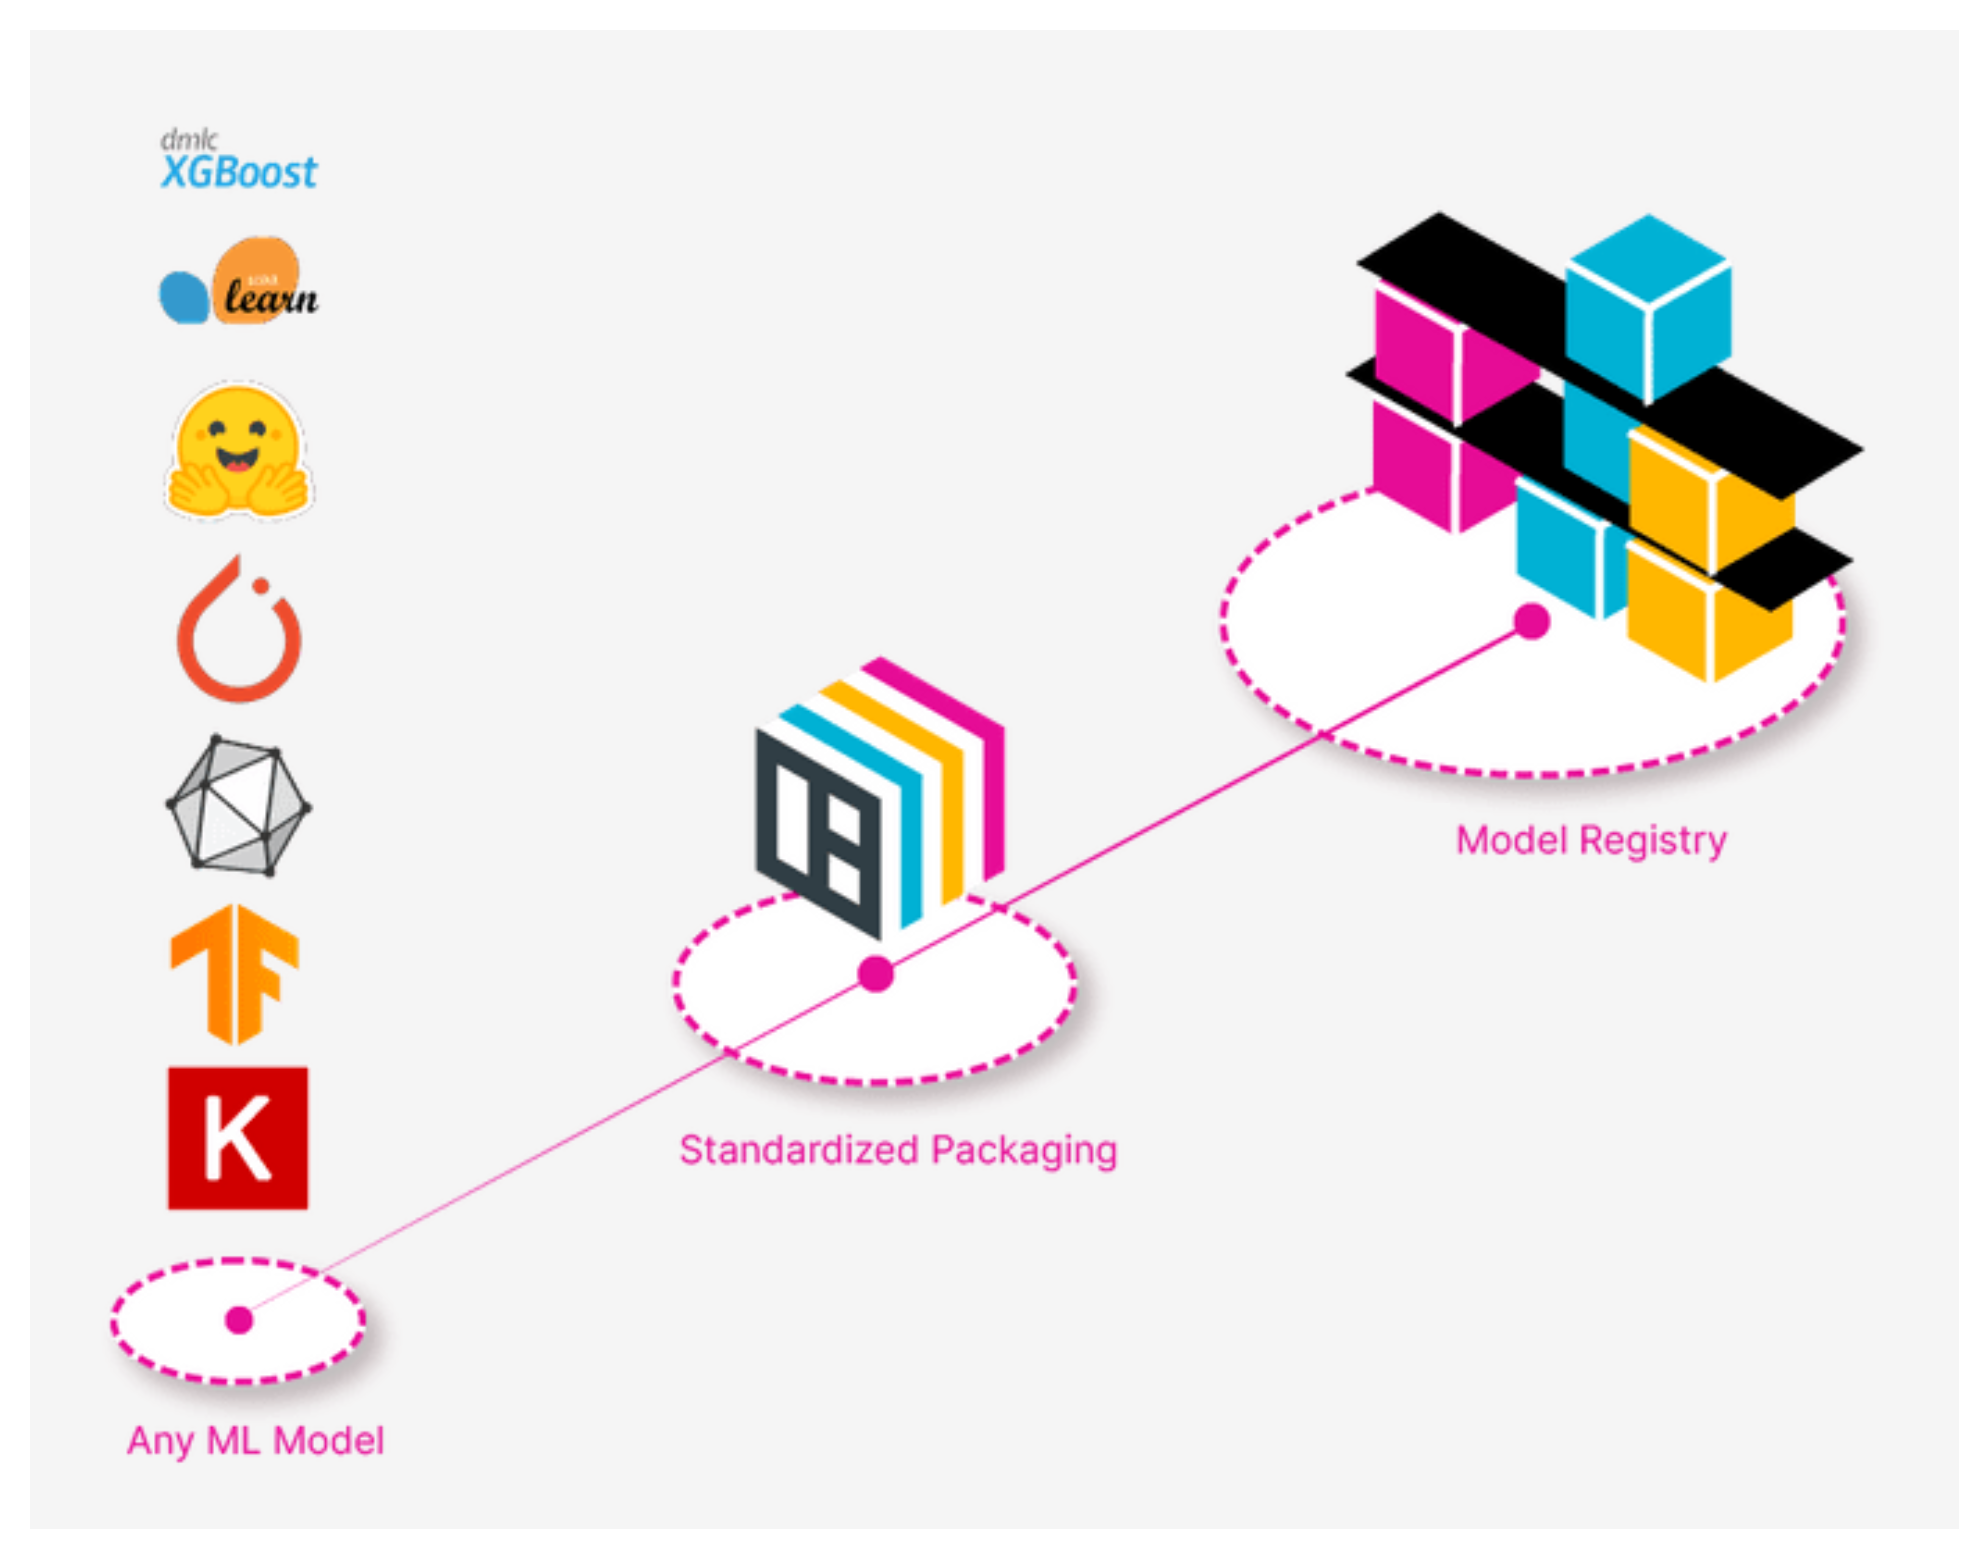

From there, you can build a Docker image of your best model with only a single commands and serve it locally:

```
$ bentoml containerize my_classifier:latest
$ docker run -it --rm -p 3000:3000 my_classifier:6otbsmxzq6lwbgxi serve --production
```

Or deploy it to any cloud provider with a few commands without leaving the CLI. Here is an example for AWS Sagemaker

```
$ pip install bentoctl terraform
$ bentoctl operator install aws-sagemaker
$ export AWS_ACCESS_KEY_ID=REPLACE_WITH_YOUR_ACCESS_KEY
$ export AWS_SECRET_ACCESS_KEY=REPLACE_WITH_YOUR_SECRET_KEY
$ bentoctl init
$ bentoctl build -b model_name:latest -f deployment_config.yaml
$ terraform init
$ terraform apply -var-file=bentoctl.tfvars -auto-approve
```

Here is a step-by-step tutorial where I show how to deploy an XGBoost model to AWS Lambda:

https://towardsdatascience.com/comprehensive-guide-to-deploying-any-ml-model-as-apis-with-python-and-aws-lambda-b441d257f1ec


Stats and links:
- [GitHub (4.4k ⭐)](https://github.com/bentoml/BentoML)
- [Docs 📚](https://docs.bentoml.org/en/latest/#)


### 2. MLFlow

What:
- Machine learning experiment tracking framework

Why:
- Automatic metric, hyperparameter capturing
- Capturing model artifacts
- Model registry
- Excellent integration with all frameworks
- Intuitive tracking UI
- Beautiful plots, etc.

Stats and links:
- [GitHub (13.3k ⭐)](https://github.com/mlflow/mlflow)
- [Docs 📚](https://mlflow.org/docs/latest/index.html)
- In action, tutorial:

https://towardsdatascience.com/complete-guide-to-experiment-tracking-with-mlflow-and-dagshub-a0439479e0b9


### 3. DVC

What:
- Git for data
- Dataset and model versioning, experiment tracking

Why:
- Go-to library, no better alternative currently
- Support for branching, commits, checkouts
- Data pipelines and run them with a single command
- Experiment tracking with a single line
- VSCode extension to plot experiments and compare them

Stats and links:
- [GitHub (10.8k ⭐)](https://github.com/iterative/dvc)
- [Docs 📚](https://dvc.org/)
- In action, tutorial:

https://medium.com/towards-data-science/how-to-version-gigabyte-sized-datasets-just-like-code-with-dvc-in-python-5197662e85bd

### 4. NannyML

What:
- Model monitoring framework
- Detect silent failure

Why:
- Models need to be monitored once deployed
- Performance estimation
- Data drift
- Failure smart alerting

Stats and links:
- [GitHub (1.3k ⭐)](https://github.com/NannyML/nannyml)
- [Docs 📚](https://nannyml.readthedocs.io/en/stable/index.html)
- In action, tutorial:

https://towardsdatascience.com/data-drift-explainability-interpretable-shift-detection-with-nannyml-83421319d05f

### 5. Weights & Biases

What:
- All-in-one MLOps platform

Why:
- Excellent integration with any framework
- Visualize experiments
- Real-time collaboration, model explaining
- Model, dataset, artifacts version
- UI (dashboards)

Stats and links:
- [GitHub (5.2k ⭐)](https://github.com/wandb/wandb)
- [Docs 📚](https://docs.wandb.ai/)


### 6. Poetry

What:
- Python packaging and dependency management framework

Why:
- Dependency resolver
- Isolation
- Easy CLI

Stats and links:
- [GitHub (23.1k ⭐)](https://github.com/python-poetry/poetry)
- [Docs 📚](https://python-poetry.org/)
- In action, tutorial:

https://realpython.com/dependency-management-python-poetry/

### 7. Prefect

What:
- Data science and ML orchestration tool

Why:
- Build ETL, data science and ML workflows
- Job scheduling
- Integrated with anything that moves

Stats and links:
- [GitHub (10.9k ⭐)](https://github.com/PrefectHQ/prefect)
- [Docs 📚](https://docs-v1.prefect.io/)
- In action, tutorial:

https://towardsdatascience.com/orchestrate-a-data-science-project-in-python-with-prefect-e69c61a49074

### Conclusion